In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style="whitegrid")

In [2]:
DATA_FOLDER = 'run/datasets/pronto/'
RAW_DATA_FOLDER = 'run/datasets/pronto/raw/'

In [3]:
# Aligning the varible with proper labels and cnveritng to float
def prepare_df(df):
    columns = df.iloc[0]
    columns[0] = 'TIMESTAMP'
    df = df.drop([0,1],axis=0)
    df.columns = columns
    for i in df.columns[1:]:
        df[i] = df[i].astype('float')
    df.index = pd.to_datetime(df['TIMESTAMP'])
    df = df.drop(['TIMESTAMP'],axis=1)
    return df

In [4]:
df_t2 = pd.read_csv(f"{RAW_DATA_FOLDER}/merged/Testday2_merged.csv")
df_t3 = pd.read_csv(f"{RAW_DATA_FOLDER}/merged/Testday3_merged.csv")
df_t4 = pd.read_csv(f"{RAW_DATA_FOLDER}/merged/Testday4_merged.csv")

df_t2['day'] = 2
df_t3['day'] = 3
df_t4['day'] = 4

<Axes: >

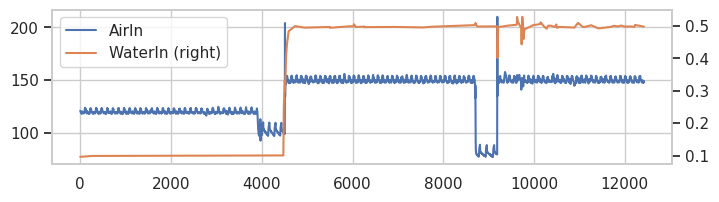

In [5]:
df_t2.plot(y=['AirIn', 'WaterIn'], secondary_y=['WaterIn'], figsize=(8, 2))

In [6]:
df_t5 = pd.read_csv(f"{RAW_DATA_FOLDER}/merged/Testday5_test11_clean.csv")
df_t5['Fault'] = 'Normal'
df_t5['day'] = 5

In [7]:
df = pd.concat([df_t2, df_t3, df_t4, df_t5], axis=0, ignore_index=True)
df.head()

,FIC301,FIC302,LI405,LI502,PT312,VC303,VC401,VC403,VC404,VC405,...,P_3phase,Air.Valve,Water.level,Water.coalescer,Water.level.valve,water.tank.level,Fault,day,LI505,Unnamed: 0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.005916,25.092310,62.243111,98.642677,2.257356,1.443121,Normal,2,NaN,NaN
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.006192,25.099390,62.235279,98.644371,2.278575,1.443152,Normal,2,NaN,NaN
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.006467,25.106461,62.227440,98.646057,2.299793,1.443183,Normal,2,NaN,NaN
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.006743,25.113529,62.219608,98.647758,2.321012,1.443214,Normal,2,NaN,NaN
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.006743,25.120600,62.262520,98.649452,2.399387,1.443244,Normal,2,NaN,NaN


In [8]:
VARS = list(df.columns[12:-2])
VARS

['AirIn',
 'Air.T',
 'Air.P',
 'WaterIn',
 'Water.T',
 'Water.Density',
 'Mixture.zone.P',
 'riser.outlet.P',
 'P.topsep',
 'FR.topsep.gas',
 'FR.topsep.liquid',
 'P_3phase',
 'Air.Valve',
 'Water.level',
 'Water.coalescer',
 'Water.level.valve',
 'water.tank.level',
 'Fault',
 'day']

In [9]:
df_selected = df[VARS]
df_selected.head()

,AirIn,Air.T,Air.P,WaterIn,Water.T,Water.Density,Mixture.zone.P,riser.outlet.P,P.topsep,FR.topsep.gas,FR.topsep.liquid,P_3phase,Air.Valve,Water.level,Water.coalescer,Water.level.valve,water.tank.level,Fault,day
0,121.053596,15.68166,1.301107,0.096309,23.748079,997.596497,1.240097,1.025907,1.027175,0.000491,0.064845,1.005916,25.092310,62.243111,98.642677,2.257356,1.443121,Normal,2
1,120.982101,15.68156,1.298735,0.096320,23.745350,997.596619,1.236252,1.027934,1.027277,0.000483,0.095639,1.006192,25.099390,62.235279,98.644371,2.278575,1.443152,Normal,2
2,120.864098,15.68147,1.296362,0.096331,23.742620,997.596619,1.240946,1.035563,1.028881,0.000476,0.095639,1.006467,25.106461,62.227440,98.646057,2.299793,1.443183,Normal,2
3,120.746002,15.68138,1.301659,0.096342,23.739889,997.596680,1.238252,1.030079,1.028640,0.000468,0.076789,1.006743,25.113529,62.219608,98.647758,2.321012,1.443214,Normal,2
4,120.627998,15.68129,1.299090,0.096354,23.737160,997.596680,1.231918,1.026742,1.028400,0.000461,0.076789,1.006743,25.120600,62.262520,98.649452,2.399387,1.443244,Normal,2


<Axes: xlabel='Fault', ylabel='count'>

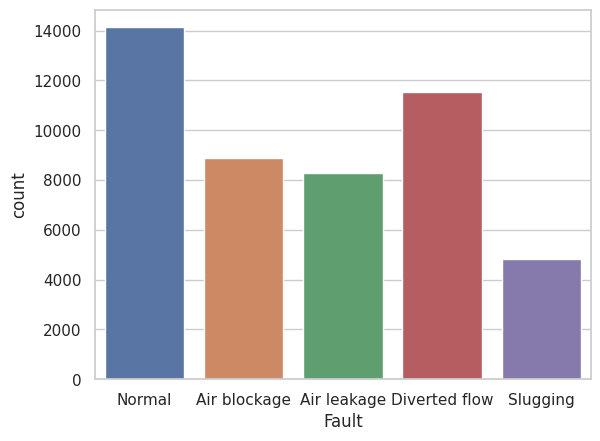

In [10]:
sns.countplot(x="Fault", data=df)

/tmp/ipykernel_995064/3829740834.py:6: UserWarning: When passing multiple axes, layout keyword is ignored.
  df_fault[::10].plot(subplots=True, ax=ax, color=color, legend=False, layout=(6, 3))


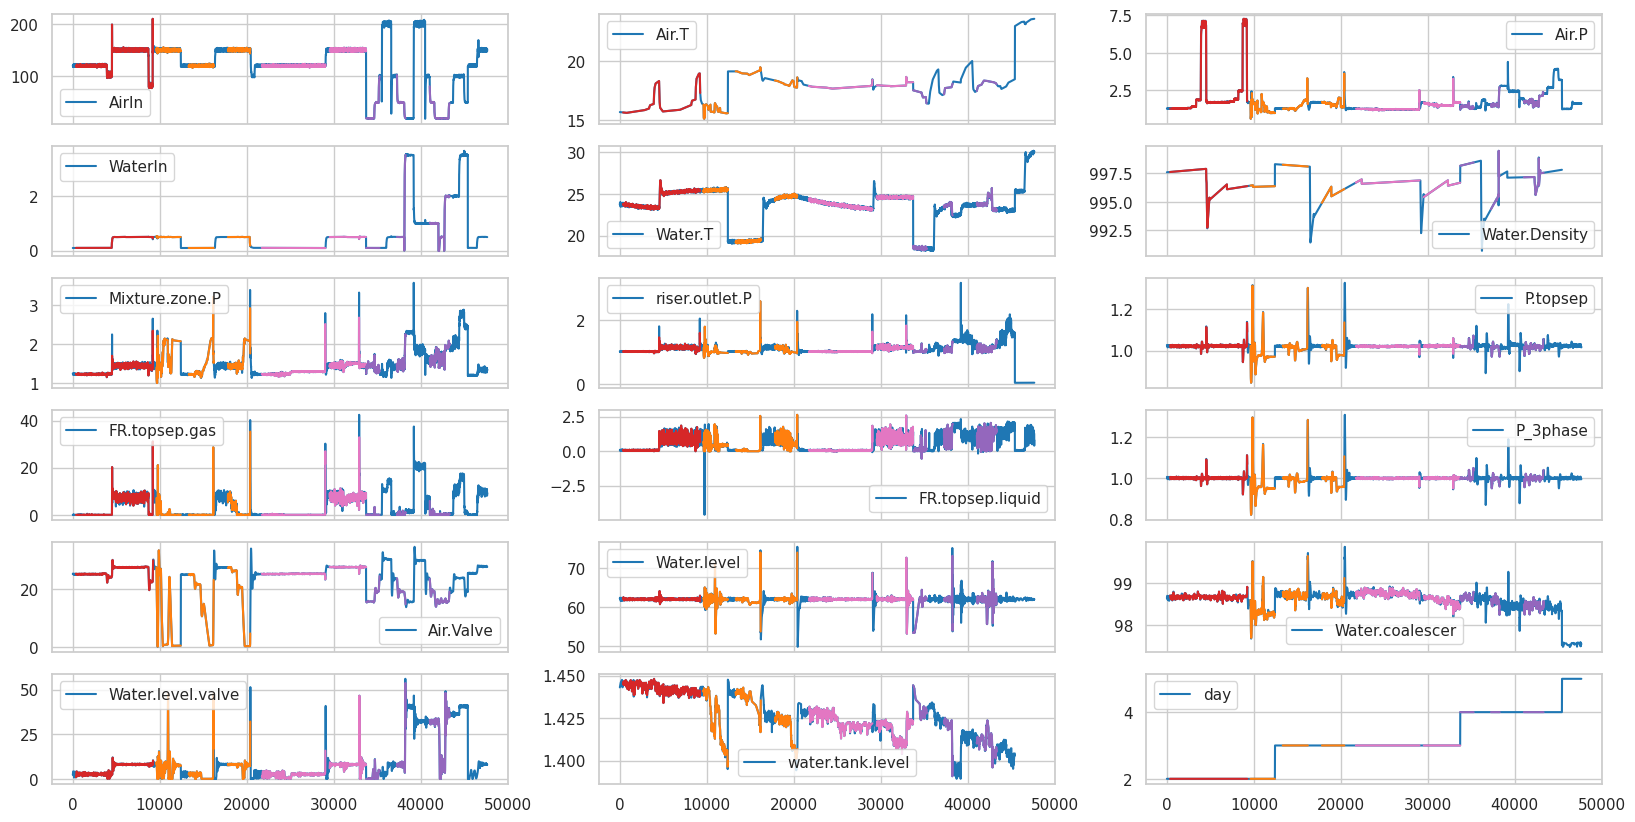

In [11]:
ax = df_selected[::5].plot(subplots=True, figsize=(20, 10), color='tab:blue', layout=(6, 3))

def plot_fault(df, fault, ax, color='tab:red'):
    df_fault = df.copy()
    df_fault[df_fault['Fault'] != fault] = np.nan
    df_fault[::10].plot(subplots=True, ax=ax, color=color, legend=False, layout=(6, 3))

plot_fault(df_selected, 'Air blockage', ax, color='tab:red')
plot_fault(df_selected, 'Air leakage', ax, color='tab:orange')
plot_fault(df_selected, 'Diverted flow', ax, color='tab:pink')
plot_fault(df_selected, 'Slugging', ax, color='tab:purple')


In [14]:
# find the column containing nan value in df_normal
MISSING_COLS = df_selected.columns[df_selected.isna().any()].tolist()
MISSING_COLS

['Water.Density', 'water.tank.level']

In [15]:
# drop the columns containing nan value in df_selected
df_selected = df_selected.drop(MISSING_COLS, axis=1)

In [16]:
# get all normal data
df_normal = df_selected[df_selected.Fault == 'Normal']

In [17]:
# get_all air leakage data
df_air_leakage = df_selected[df_selected.Fault == 'Air leakage']

In [18]:
# get all air blockage data
df_air_blockage = df_selected[df_selected.Fault == 'Air blockage']


In [19]:
# all faults 
df_faults = df_selected[df_selected.Fault != 'Normal']

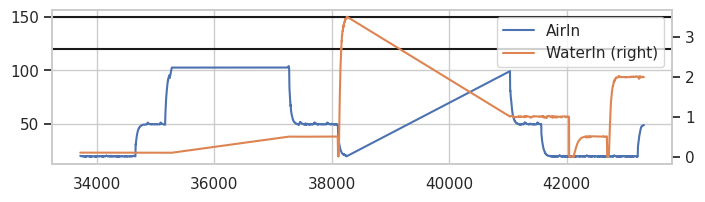

In [20]:
# plot all Slugging Faults
df_slugging = df_selected[df_selected.Fault == 'Slugging']

ax = df_slugging.plot(y=['AirIn', 'WaterIn'], secondary_y=['WaterIn'], figsize=(8, 2))

# draw horizontal line at 120
ax.axhline(y=120, color='k', linestyle='-')
ax.axhline(y=150, color='k', linestyle='-')


In [21]:
df_diverted_flow = df_selected[df_selected.Fault == 'Diverted flow']
df_diverted_flow.to_csv(f"{DATA_FOLDER}/diverted_flow.csv", index=False)

In [22]:
SAVE = False


if SAVE:
    # write out all data
    df_normal.to_csv(f"{DATA_FOLDER}/normal.csv", index=False)
    df_air_leakage.to_csv(f"{DATA_FOLDER}/air_leakage.csv", index=False)
    df_air_blockage.to_csv(f"{DATA_FOLDER}/air_blockage.csv", index=False)
    df_faults.to_csv(f"{DATA_FOLDER}/faults.csv", index=False)
    df_slugging.to_csv(f"{DATA_FOLDER}/slugging.csv", index=False)